In [19]:
from skimage import io, color, segmentation, measure, morphology
from skimage.measure import find_contours
from skimage.draw import polygon_perimeter
from skimage.color import label2rgb
from skimage.util import img_as_float, img_as_ubyte
from skimage.filters import prewitt, prewitt_v, prewitt_h, threshold_otsu, gaussian, median
from skimage.morphology import disk, opening, closing
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# Read the image
in_dir = "Data/"
#img_panels = io.imread(in_dir + "solar_park_1.png")
img_panels = io.imread(in_dir + "solar_park_2.png")

In [26]:
# Useful functions
def threshold_image(img_in):
    try:
        if img_in.shape[2] == 3:
            img = color.rgb2gray(img_in)
            img = img_as_ubyte(img)
    except IndexError:
        img = img_in.copy()
        img = img_as_ubyte(img)
    thres = threshold_otsu(img)
    img[img >= thres] = 255
    img[img < thres] = 0
    return img

def show_comparison(original, transformed, transformed_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(transformed)
    ax2.set_title(transformed_name)
    ax2.axis('off')
    plt.show()

def drawShape(img, coordinates, colour):
    # In order to draw our line in red
    img = color.gray2rgb(img)

    # Make sure the coordinates are expressed as integers
    coordinates = coordinates.astype(int)

    img[coordinates[:, 0], coordinates[:, 1]] = colour

    return img

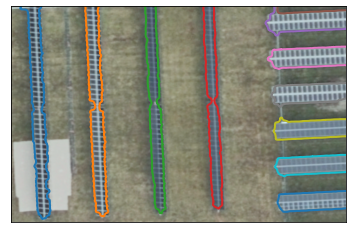

In [27]:
# Pre-processing
# After testing, a gaussian filter is not what we need here, but a median filter could be good
# Filter
plt.close()
size = 3
kernel = np.ones([size, size, size])
panel_med = median(img_panels, kernel)

# Gradients
panel_gradm = prewitt(panel_med[:,:,:3])

# Thresholding
grad_med = threshold_image(panel_gradm)

# Clear borders
#med_cb = segmentation.clear_border(grad_med)

# Morphology
kernel = disk(5)
med_open = opening(grad_med, kernel)
kernel = disk(15)
med_close = closing(med_open, kernel)

# Labelling
# med_label = measure.label(med_close)
# med_overlay = label2rgb(med_label)
# print(f"Shape: {med_label.shape}")

# Contours
med_close = morphology.remove_small_objects(med_close, 50)
med_close = morphology.remove_small_holes(med_close, 50)
contours = find_contours(med_close)

# Bounding boxes
# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(img_panels)

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

# Compare
# show_comparison(img_panels, panel_med, "Median filter")
# show_comparison(img_panels, panel_gradm, "Median + Prewitt")
# show_comparison(img_panels, grad_med, "Thresholded prewitt")
# show_comparison(grad_med, med_open, "With opening")
# show_comparison(med_open, med_close, "With closing")
# show_comparison(img_panels, med_overlay, "Found blobs")

In [ ]:
# Show results
%matplotlib widget
plt.close()
fig, ax = plt.figure()
plt.imshow()